# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("../loan_data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [6]:
df.shape

(614, 13)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

Look at some basic statistics for numerical variables.

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [9]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

/var/folders/_w/k40rbx_x0yd88dyx542lggnc0000gn/T/ipykernel_46451/4159679822.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


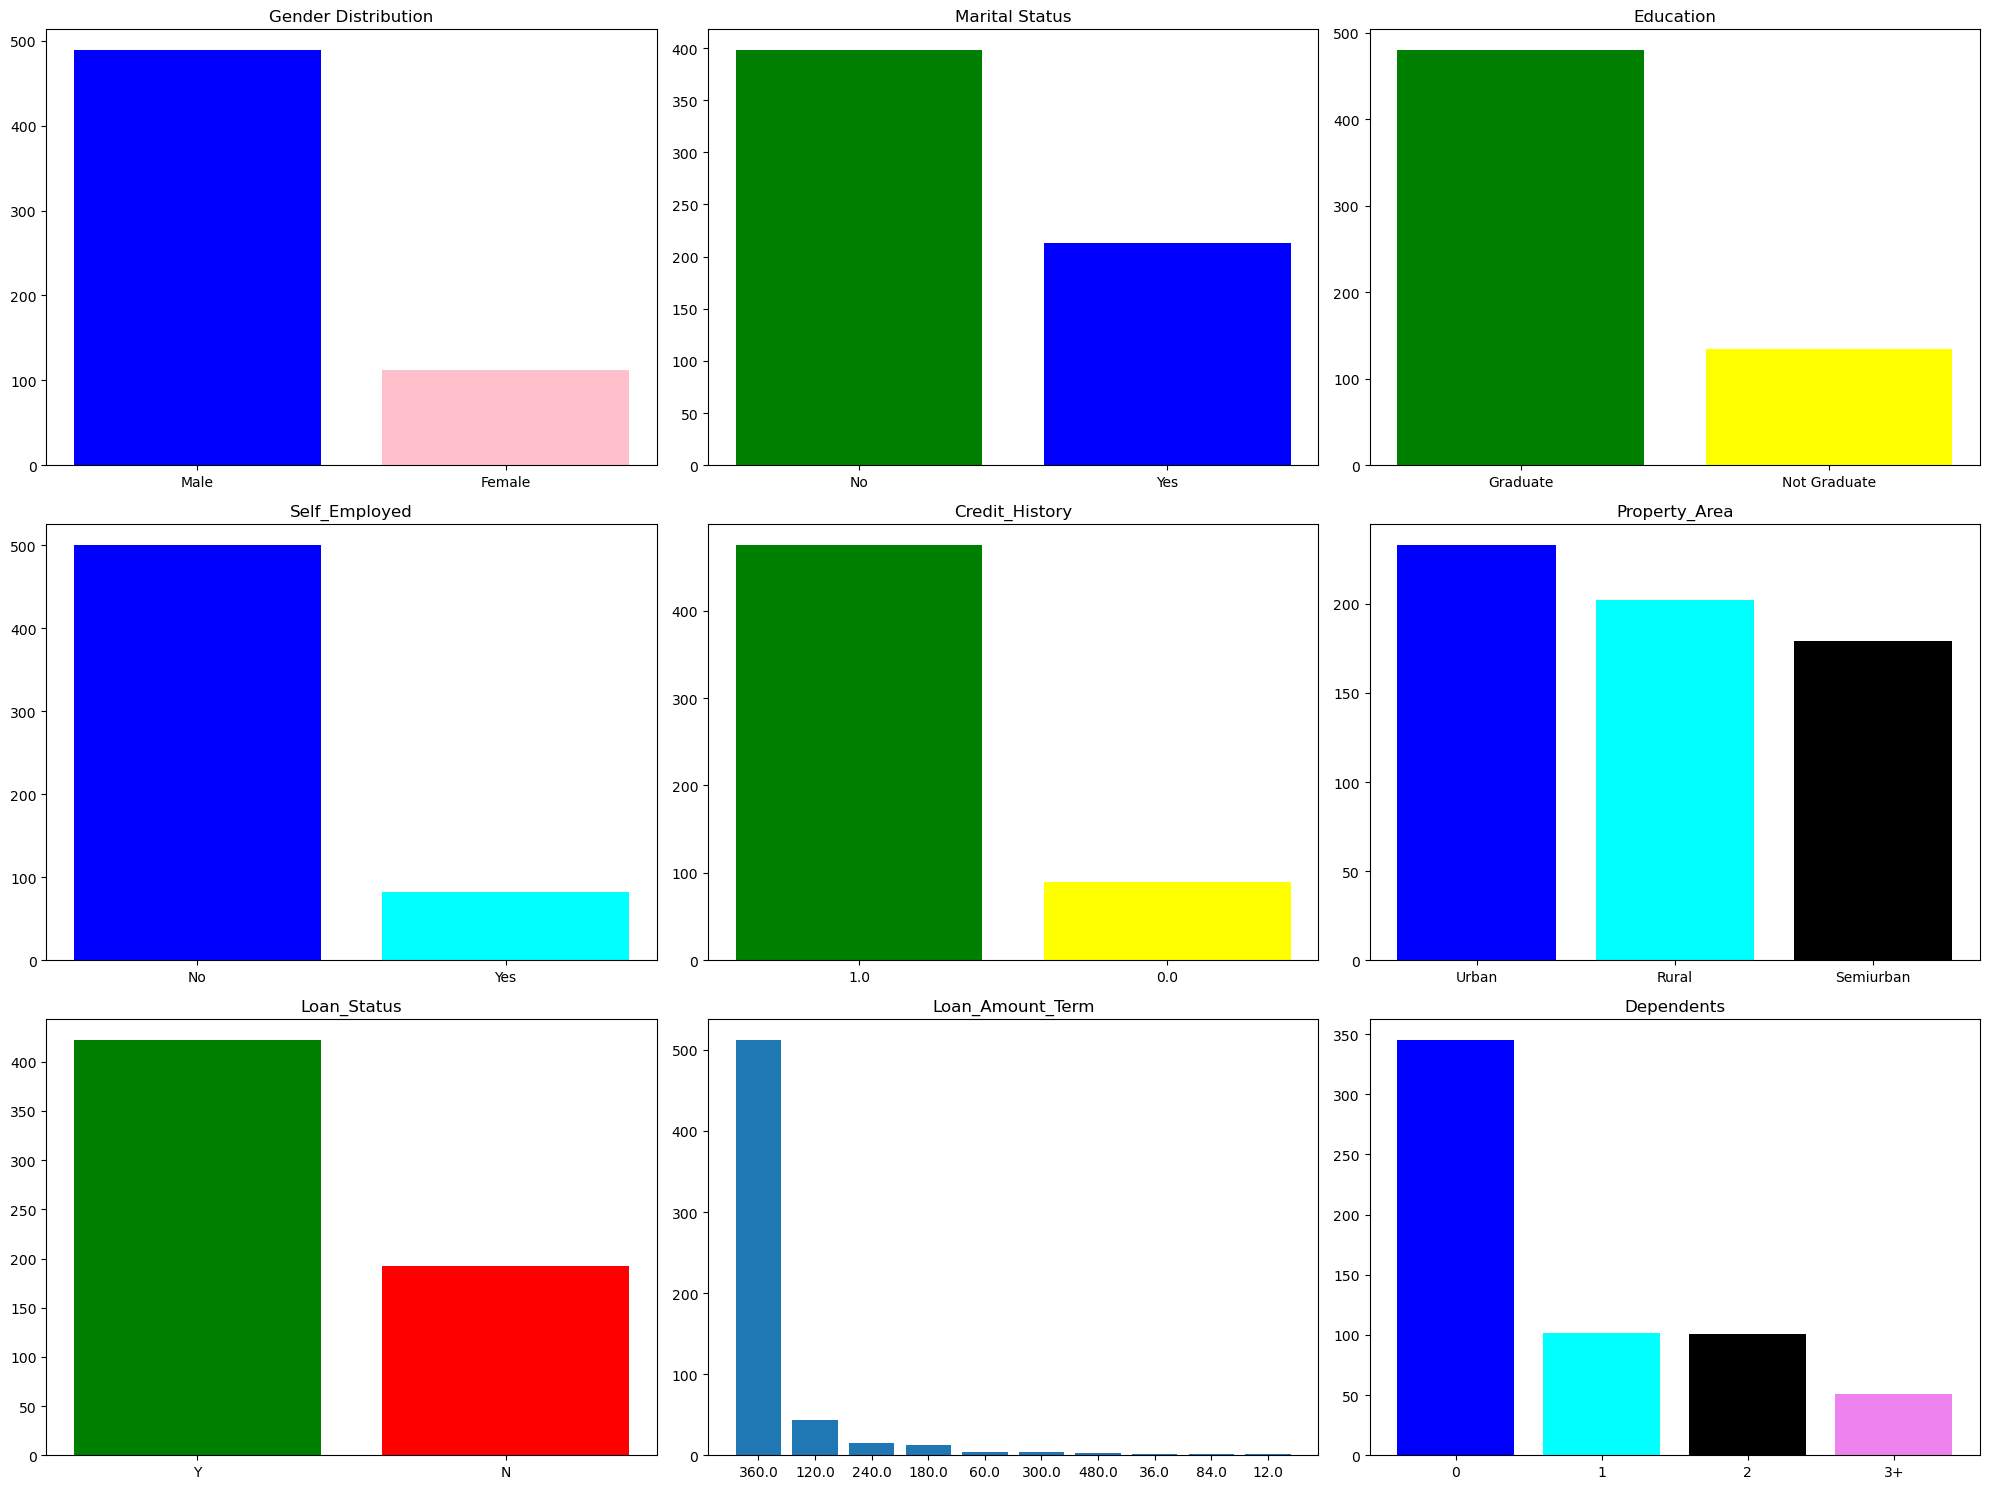

In [775]:
fig, ax = plt.subplots(3, 3)
fig.set_size_inches(20,15)


ax[0][0].bar(list(df['Gender'].dropna().unique()), list(df['Gender'].value_counts()),color=['blue','pink'])
ax[0][0].set_title('Gender Distribution')
ax[0][1].bar(list(df['Married'].dropna().unique()), list(df['Married'].value_counts()),color=['green','blue'])
ax[0][1].set_title('Marital Status')
ax[0][2].bar(list(df['Education'].dropna().unique()), list(df['Education'].value_counts()),color=['green','yellow'])
ax[0][2].set_title('Education')
ax[1][0].bar(list(df['Self_Employed'].dropna().unique()), list(df['Self_Employed'].value_counts()),color=['blue','cyan'])
ax[1][0].set_title('Self_Employed')
ax[1][1].bar(list(df['Credit_History'].dropna().unique().astype(str)), list(df['Credit_History'].value_counts()),color=['green','yellow'])
ax[1][1].set_title('Credit_History')
ax[1][2].bar(list(df['Property_Area'].dropna().unique()), list(df['Property_Area'].value_counts()),color=['blue','cyan','black'])
ax[1][2].set_title('Property_Area')
ax[2][0].bar(list(df['Loan_Status'].dropna().unique()), list(df['Loan_Status'].value_counts()),color=['green','red'])
ax[2][0].set_title('Loan_Status')
ax[2][1].bar(list(df['Loan_Amount_Term'].dropna().unique().astype(str)), list(df['Loan_Amount_Term'].value_counts()))
ax[2][1].set_title('Loan_Amount_Term')
ax[2][2].bar(list(df['Dependents'].dropna().unique().astype(str)), list(df['Dependents'].value_counts()), color=['blue','cyan','black','violet'])
ax[2][2].set_title('Dependents')

fig.tight_layout()
fig.show()

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



/var/folders/_w/k40rbx_x0yd88dyx542lggnc0000gn/T/ipykernel_46451/528430328.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


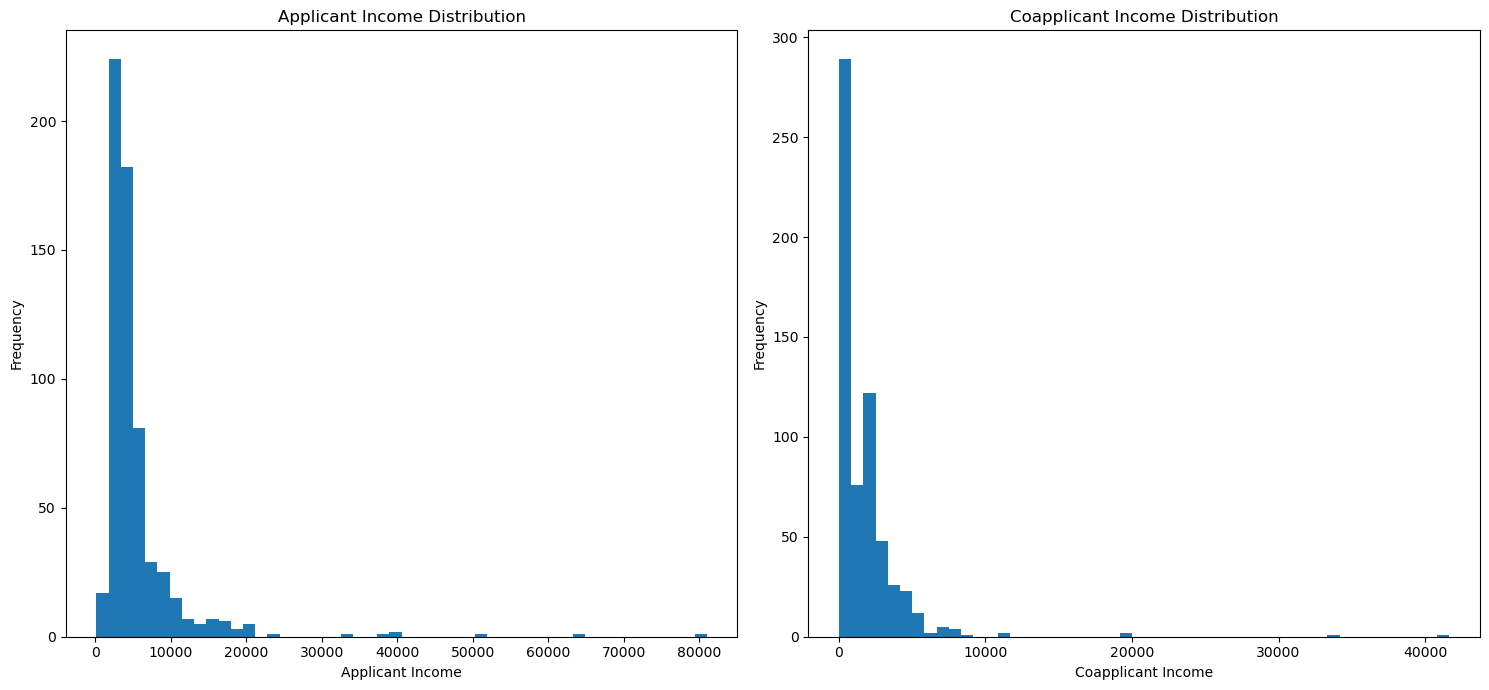

In [104]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15,7)

ax[0].hist(df['ApplicantIncome'],bins=50)
ax[0].set_title('Applicant Income Distribution')
ax[0].set_xlabel('Applicant Income')
ax[0].set_ylabel('Frequency')

ax[1].hist(df['CoapplicantIncome'],bins=50)
ax[1].set_title('Coapplicant Income Distribution')
ax[1].set_xlabel('Coapplicant Income')
ax[1].set_ylabel('Frequency')

fig.tight_layout()
fig.show()


Look at box plots to understand the distributions. 

/var/folders/_w/k40rbx_x0yd88dyx542lggnc0000gn/T/ipykernel_46451/816089713.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


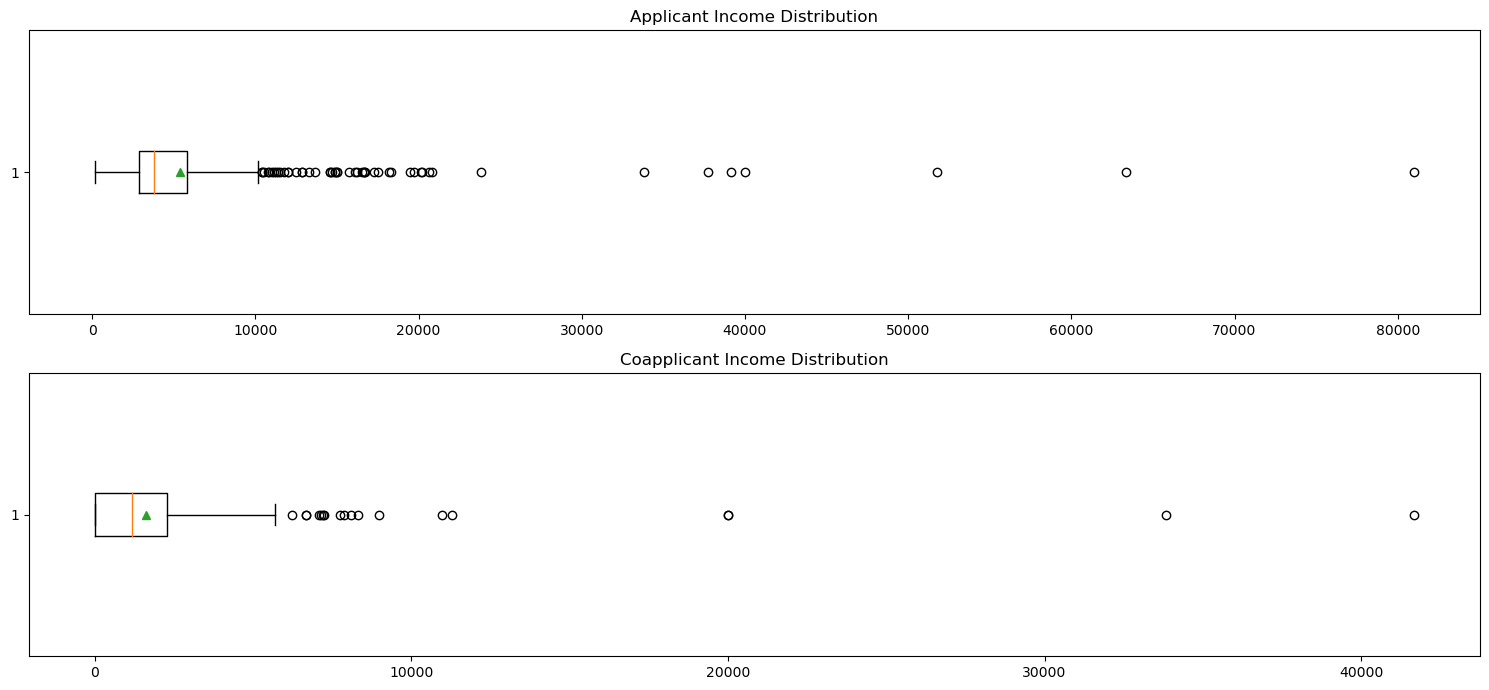

In [105]:
fig, ax = plt.subplots(2, 1)
fig.set_size_inches(15,7)

ax[0].boxplot(df['ApplicantIncome'], showmeans=True, vert=False)
ax[0].set_title('Applicant Income Distribution')

ax[1].boxplot(df['CoapplicantIncome'], showmeans=True, vert=False)
ax[1].set_title('Coapplicant Income Distribution')

fig.tight_layout()
fig.show()

Look at the distribution of income segregated  by `Education`

/var/folders/_w/k40rbx_x0yd88dyx542lggnc0000gn/T/ipykernel_46451/1177045988.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


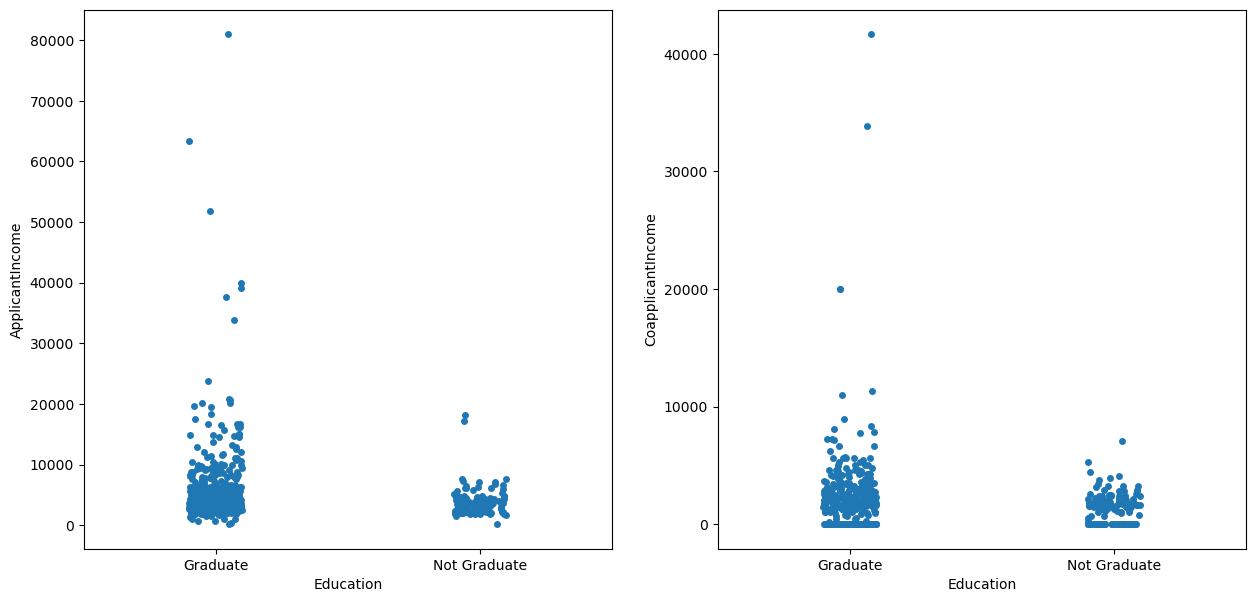

In [759]:
import seaborn as sns

fig, ax =plt.subplots(1,2)
fig.set_size_inches(15,7)

sns.stripplot(data=df, x = "Education", y = "ApplicantIncome", ax=ax[0])
sns.stripplot(data=df, x = "Education", y = "CoapplicantIncome", ax=ax[1])

fig.show()

Look at the histogram and boxplot of LoanAmount

<bound method Figure.show of <Figure size 1500x700 with 1 Axes>>

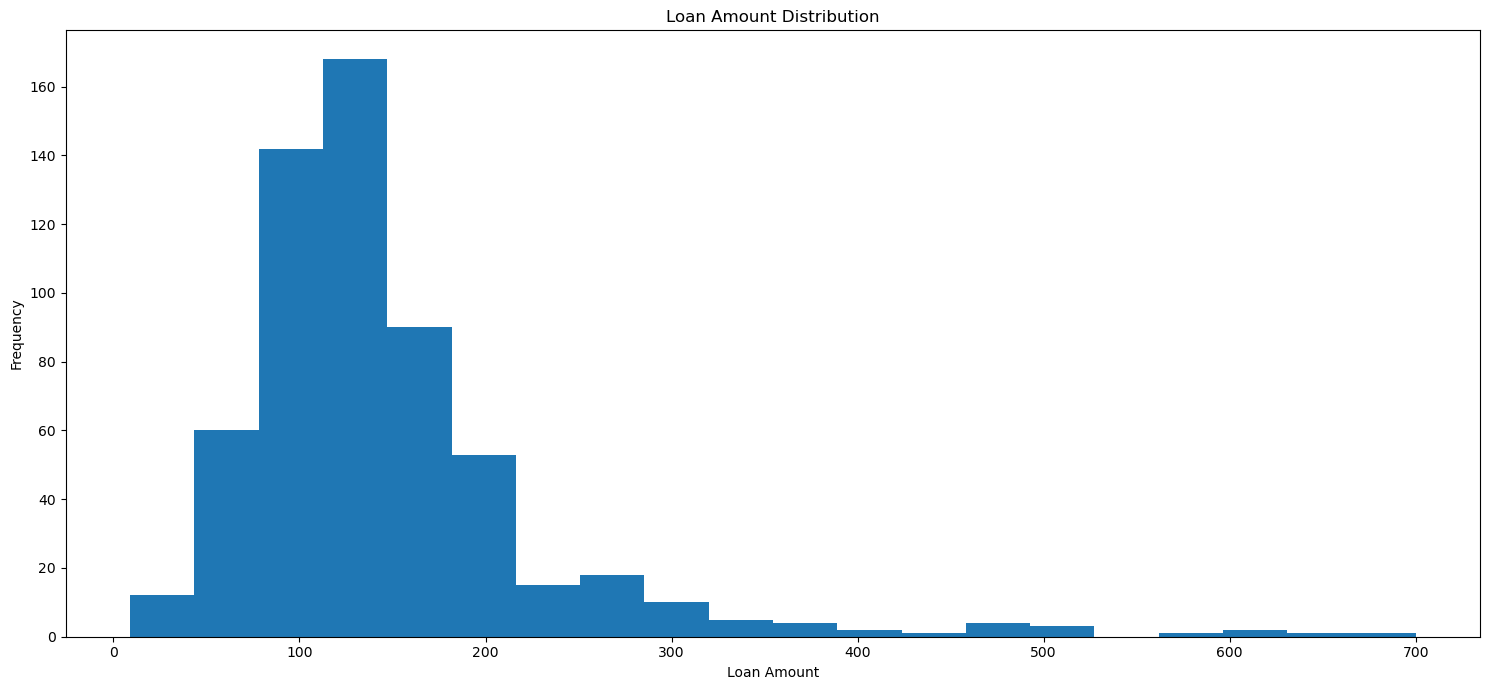

In [98]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)

ax.hist(df['LoanAmount'],bins=20)
ax.set_title('Loan Amount Distribution')
ax.set_xlabel('Loan Amount')
ax.set_ylabel('Frequency')

fig.tight_layout()
fig.show

<bound method Figure.show of <Figure size 1500x700 with 1 Axes>>

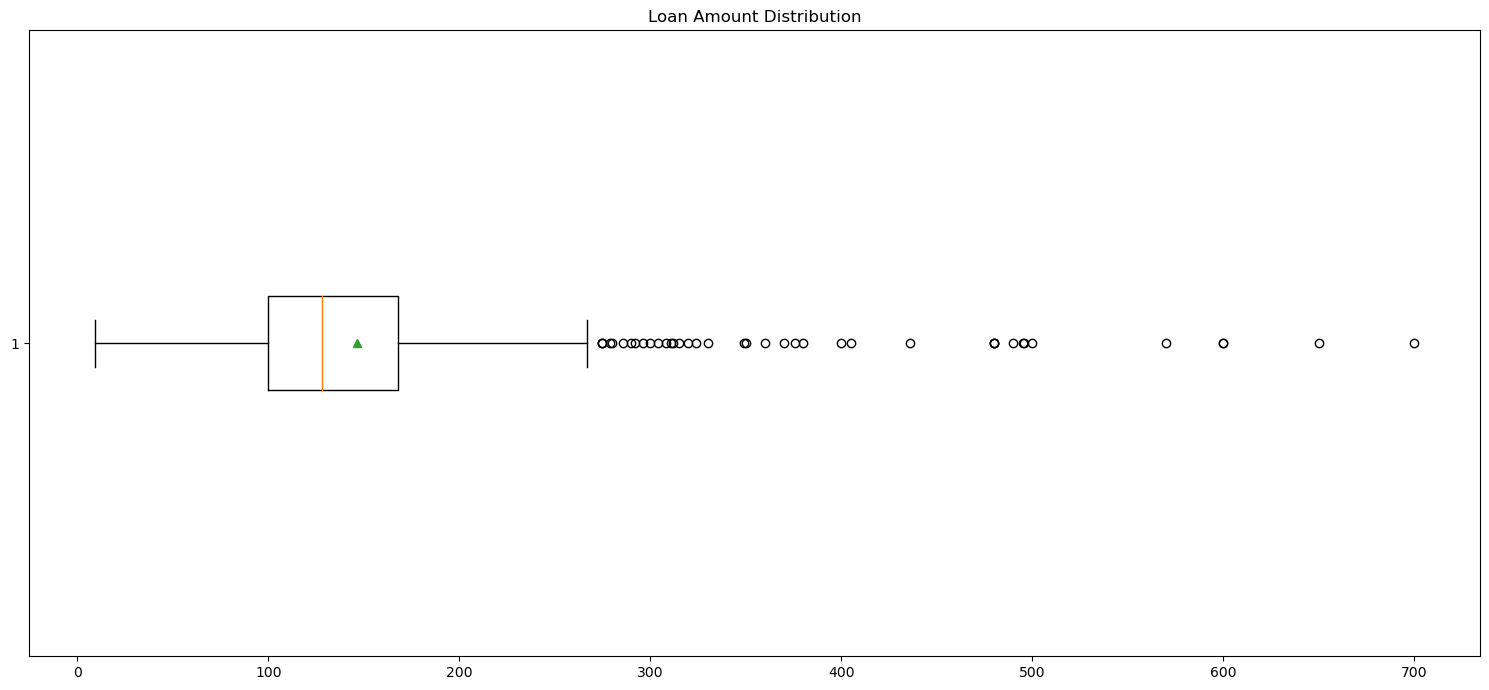

In [97]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)

ax.boxplot(df['LoanAmount'][~np.isnan(df['LoanAmount'])],vert=False,showmeans=True)
ax.set_title('Loan Amount Distribution')

fig.tight_layout()
fig.show

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

/var/folders/_w/k40rbx_x0yd88dyx542lggnc0000gn/T/ipykernel_46451/2042982918.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


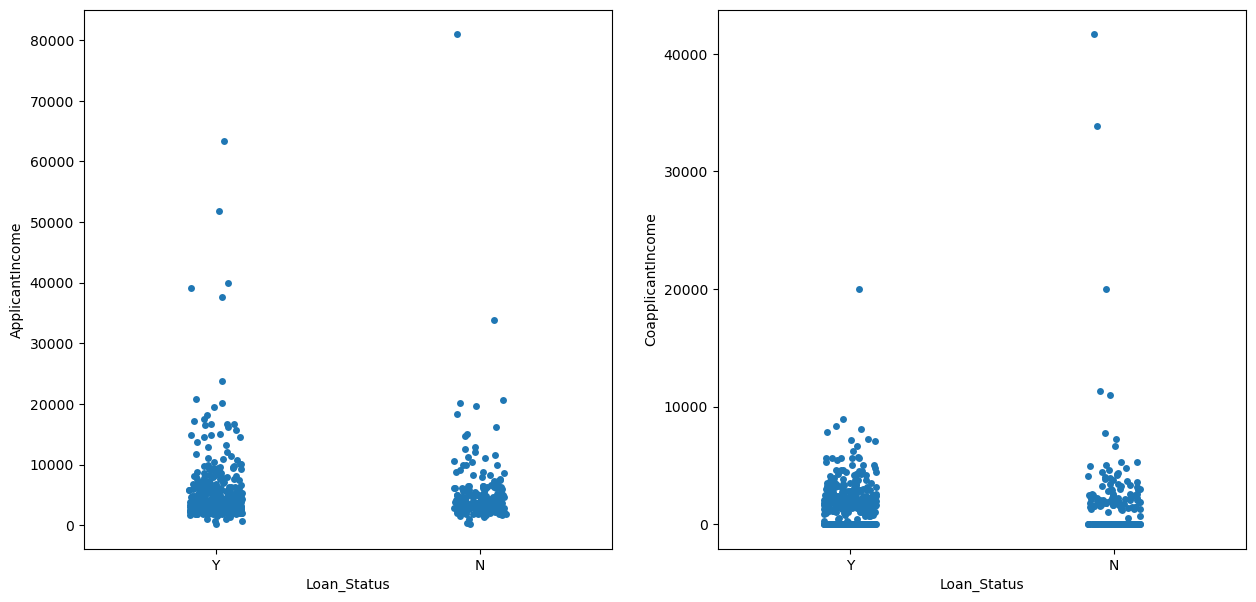

In [572]:
import seaborn as sns

fig, ax =plt.subplots(1,2)
fig.set_size_inches(15,7)

sns.stripplot(data=df, x = "Loan_Status", y = "ApplicantIncome", ax= ax[0])
sns.stripplot(data=df, x = "Loan_Status", y = "CoapplicantIncome", ax= ax[1])

fig.show()

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [456]:
df_cleaning = df.copy()

In [457]:
df_cleaning.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [458]:
#combine the applicant and co-applicant income as total income.
df_cleaning['TotalIncome'] = df_cleaning['ApplicantIncome'] + df_cleaning['CoapplicantIncome']
df_cleaning.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,3849.0
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,5540.0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,5532.0
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,23809.0


/var/folders/_w/k40rbx_x0yd88dyx542lggnc0000gn/T/ipykernel_46451/741008495.py:5: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  sns.stripplot(data=pd.DataFrame(pd.pivot_table(df_cleaning, index=['Dependents'], aggfunc='median')), x = "Dependents", y = "TotalIncome")
/var/folders/_w/k40rbx_x0yd88dyx542lggnc0000gn/T/ipykernel_46451/741008495.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


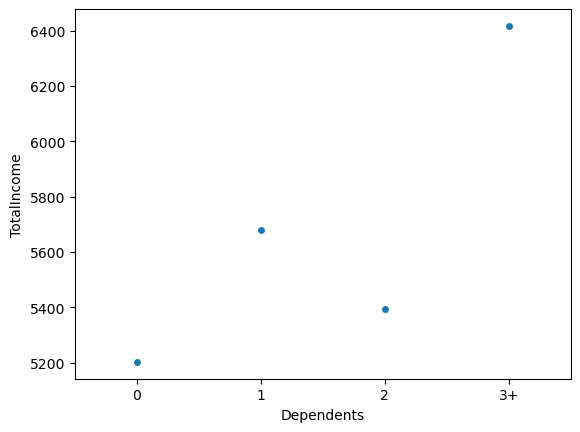

In [767]:
#plot each category against the income distribution and look for pattern, if any. Also, utilize the earlier category 
#frequency distribution to impute missing values.
import seaborn as sns

sns.stripplot(data=pd.DataFrame(pd.pivot_table(df_cleaning, index=['Dependents'], aggfunc='median')), x = "Dependents", y = "TotalIncome")

fig.show()

In [466]:
df_cleaning.loc[((df_cleaning['Dependents'].isnull()) & (df_cleaning['TotalIncome'] >= 6000.0)), ['Dependents']] = '3+'
df_cleaning.loc[((df_cleaning['Dependents'].isnull()) & (df_cleaning['TotalIncome'] <= 6000.0)), ['Dependents']] = '0'

/var/folders/_w/k40rbx_x0yd88dyx542lggnc0000gn/T/ipykernel_46451/3745220944.py:3: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  sns.stripplot(data=pd.DataFrame(pd.pivot_table(df_cleaning, index=['Married'], aggfunc='median')), x = "Married", y = "TotalIncome")
/var/folders/_w/k40rbx_x0yd88dyx542lggnc0000gn/T/ipykernel_46451/3745220944.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


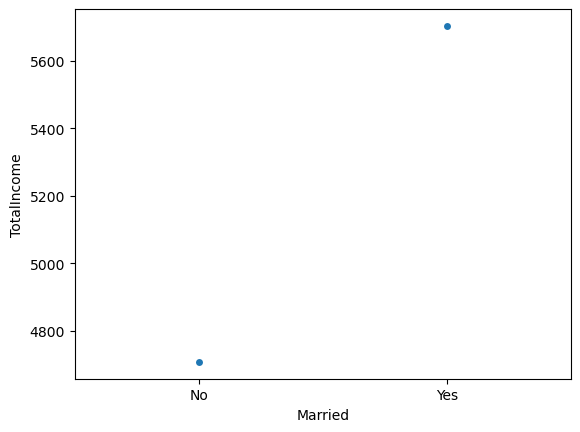

In [768]:
import seaborn as sns

sns.stripplot(data=pd.DataFrame(pd.pivot_table(df_cleaning, index=['Married'], aggfunc='median')), x = "Married", y = "TotalIncome")

fig.show()

In [470]:
df_cleaning.loc[((df_cleaning['Married'].isnull()) & (df_cleaning['TotalIncome'] >= 5000.0)), ['Married']] = 'Yes'
df_cleaning.loc[((df_cleaning['Married'].isnull()) & (df_cleaning['TotalIncome'] < 5000.0)), ['Married']] = 'No'

/var/folders/_w/k40rbx_x0yd88dyx542lggnc0000gn/T/ipykernel_46451/1677684569.py:3: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  sns.stripplot(data=pd.DataFrame(pd.pivot_table(df_cleaning, index=['Gender'], aggfunc='median')), x = "Gender", y = "TotalIncome")
/var/folders/_w/k40rbx_x0yd88dyx542lggnc0000gn/T/ipykernel_46451/1677684569.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


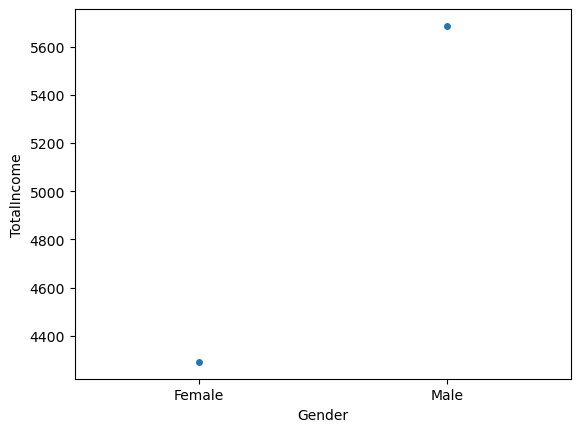

In [769]:
import seaborn as sns

sns.stripplot(data=pd.DataFrame(pd.pivot_table(df_cleaning, index=['Gender'], aggfunc='median')), x = "Gender", y = "TotalIncome")

fig.show()

In [473]:
df_cleaning.loc[((df_cleaning['Gender'].isnull()) & (df_cleaning['TotalIncome'] >= 4600.0)), ['Gender']] = 'Male'
df_cleaning.loc[((df_cleaning['Gender'].isnull()) & (df_cleaning['TotalIncome'] < 4600.0)), ['Gender']] = 'Female'

/var/folders/_w/k40rbx_x0yd88dyx542lggnc0000gn/T/ipykernel_46451/668199259.py:3: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  sns.stripplot(data=pd.DataFrame(pd.pivot_table(df_cleaning, index=['Self_Employed'], aggfunc='median')), x = "Self_Employed", y = "TotalIncome")
/var/folders/_w/k40rbx_x0yd88dyx542lggnc0000gn/T/ipykernel_46451/668199259.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


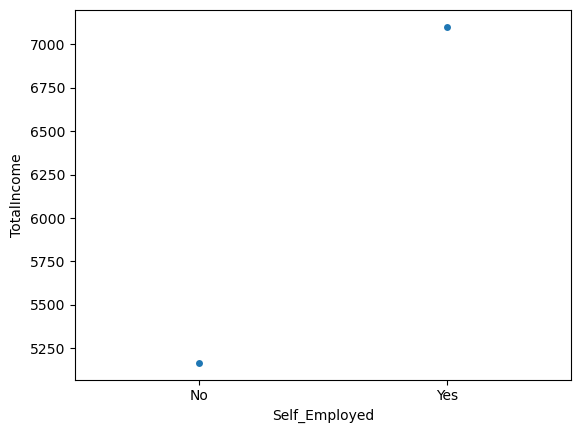

In [770]:
import seaborn as sns

sns.stripplot(data=pd.DataFrame(pd.pivot_table(df_cleaning, index=['Self_Employed'], aggfunc='median')), x = "Self_Employed", y = "TotalIncome")

fig.show()

In [477]:
df_cleaning.loc[((df_cleaning['Self_Employed'].isnull()) & (df_cleaning['TotalIncome'] >= 6750.0)), ['Self_Employed']] = 'Yes'
df_cleaning.loc[((df_cleaning['Self_Employed'].isnull()) & (df_cleaning['TotalIncome'] < 6750.0)), ['Self_Employed']] = 'No'

/var/folders/_w/k40rbx_x0yd88dyx542lggnc0000gn/T/ipykernel_46451/1460557056.py:3: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  sns.stripplot(data=pd.DataFrame(pd.pivot_table(df_cleaning, index=['Credit_History'], aggfunc='median')), x = "Credit_History", y = "TotalIncome")
/var/folders/_w/k40rbx_x0yd88dyx542lggnc0000gn/T/ipykernel_46451/1460557056.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


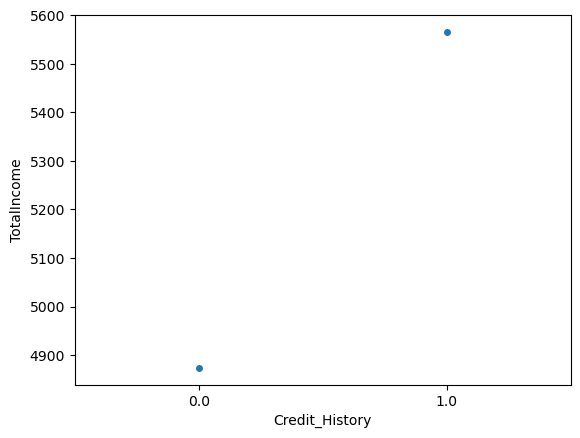

In [771]:
import seaborn as sns

sns.stripplot(data=pd.DataFrame(pd.pivot_table(df_cleaning, index=['Credit_History'], aggfunc='median')), x = "Credit_History", y = "TotalIncome")

fig.show()

In [480]:
df_cleaning.loc[((df_cleaning['Credit_History'].isnull()) & (df_cleaning['TotalIncome'] >= 5275.0)), ['Credit_History']] = 1.0
df_cleaning.loc[((df_cleaning['Credit_History'].isnull()) & (df_cleaning['TotalIncome'] < 5275.0)), ['Credit_History']] = 0.0

/var/folders/_w/k40rbx_x0yd88dyx542lggnc0000gn/T/ipykernel_46451/1669423924.py:3: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  sns.stripplot(data=pd.DataFrame(pd.pivot_table(df_cleaning, index=['Loan_Amount_Term'], aggfunc='median')), x = "Loan_Amount_Term", y = "TotalIncome")
/var/folders/_w/k40rbx_x0yd88dyx542lggnc0000gn/T/ipykernel_46451/1669423924.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


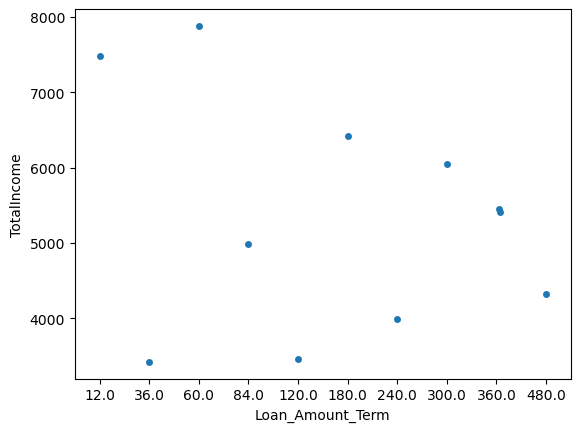

In [772]:
import seaborn as sns

sns.stripplot(data=pd.DataFrame(pd.pivot_table(df_cleaning, index=['Loan_Amount_Term'], aggfunc='median')), x = "Loan_Amount_Term", y = "TotalIncome")

fig.show()

In [483]:
df_cleaning.loc[((df_cleaning['Loan_Amount_Term'].isnull()) & (df_cleaning['LoanAmount'] <= 25.0)), ['Loan_Amount_Term']] = '120.0'
df_cleaning.loc[((df_cleaning['Loan_Amount_Term'].isnull()) & (df_cleaning['LoanAmount'] > 25.0)), ['Loan_Amount_Term']] = '360.0'

In [522]:
#Extract the target value which is loan status.

df_target = pd.DataFrame(df_cleaning['Loan_Status'])
df_target

,Loan_Status
1,N
2,Y
3,Y
4,Y
5,Y
...,...
609,Y
610,Y
611,Y
612,Y


In [606]:
#start with feature engineering.

df_feats = df_cleaning.copy()

In [607]:
df_feats.drop(columns=['Loan_ID','ApplicantIncome','CoapplicantIncome','Loan_Status'], inplace=True)

In [608]:
df_feats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 1 to 613
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            592 non-null    object 
 1   Married           592 non-null    object 
 2   Dependents        592 non-null    object 
 3   Education         592 non-null    object 
 4   Self_Employed     592 non-null    object 
 5   LoanAmount        592 non-null    float64
 6   Loan_Amount_Term  592 non-null    object 
 7   Credit_History    592 non-null    float64
 8   Property_Area     592 non-null    object 
 9   TotalIncome       592 non-null    float64
dtypes: float64(3), object(7)
memory usage: 67.0+ KB


In [609]:
df_feats.count()

Gender              592
Married             592
Dependents          592
Education           592
Self_Employed       592
LoanAmount          592
Loan_Amount_Term    592
Credit_History      592
Property_Area       592
TotalIncome         592
dtype: int64

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [611]:
df_feats_log = df_feats.copy()

In [612]:
df_feats_log[['LoanAmount','TotalIncome']] = np.log(df_feats[['LoanAmount','TotalIncome']])

In [613]:
df_feats_log.head(10)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
1,Male,Yes,1,Graduate,No,4.852030,360.0,1.0,Rural,8.714568
2,Male,Yes,0,Graduate,Yes,4.189655,360.0,1.0,Urban,8.006368
3,Male,Yes,0,Not Graduate,No,4.787492,360.0,1.0,Urban,8.505323
4,Male,No,0,Graduate,No,4.948760,360.0,1.0,Urban,8.699515
5,Male,Yes,2,Graduate,Yes,5.587249,360.0,1.0,Urban,9.170872
6,Male,Yes,0,Not Graduate,No,4.553877,360.0,1.0,Urban,8.255569
7,Male,Yes,3+,Graduate,No,5.062595,360.0,0.0,Semiurban,8.619750
8,Male,Yes,2,Graduate,No,5.123964,360.0,1.0,Urban,8.618305
9,Male,Yes,1,Graduate,No,5.855072,360.0,1.0,Semiurban,10.077819
10,Male,Yes,2,Graduate,No,4.248495,360.0,1.0,Urban,8.268732


/var/folders/_w/k40rbx_x0yd88dyx542lggnc0000gn/T/ipykernel_46451/1937500572.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


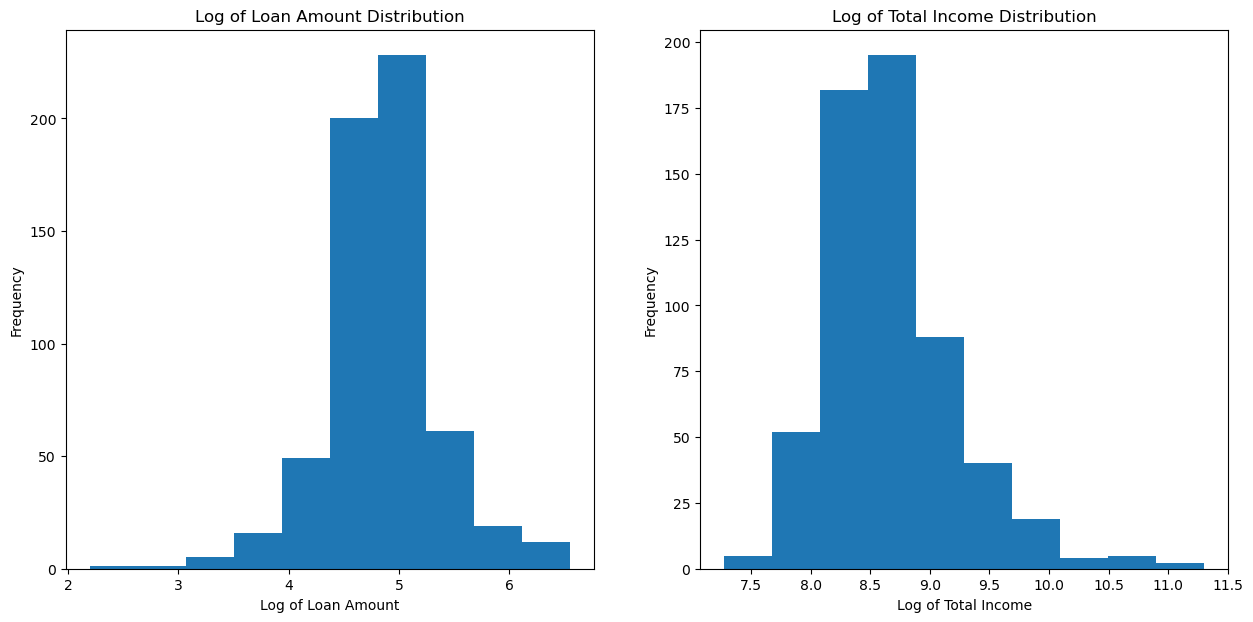

In [614]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15,7)

ax[0].hist(df_feats_log['LoanAmount'])
ax[0].set_title('Log of Loan Amount Distribution')
ax[0].set_xlabel('Log of Loan Amount')
ax[0].set_ylabel('Frequency')

ax[1].hist(df_feats_log['TotalIncome'])
ax[1].set_title('Log of Total Income Distribution')
ax[1].set_xlabel('Log of Total Income')
ax[1].set_ylabel('Frequency')

fig.tight_layout
fig.show()

## 4. Building a Predictive Model

In [618]:
#Encode the target variable with label encoder.

from sklearn import preprocessing

target_column = df_target.columns

le = preprocessing.LabelEncoder()

arr_target = le.fit_transform(np.array(df_target))

arr_target.shape

(592,)

In [773]:
#convert all inout features to string to be able to perform one hot encoding during pipeline transformation.
df_feats = df_feats_log.astype(str)

In [631]:
df_feats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 1 to 613
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            592 non-null    object
 1   Married           592 non-null    object
 2   Dependents        592 non-null    object
 3   Education         592 non-null    object
 4   Self_Employed     592 non-null    object
 5   LoanAmount        592 non-null    object
 6   Loan_Amount_Term  592 non-null    object
 7   Credit_History    592 non-null    object
 8   Property_Area     592 non-null    object
 9   TotalIncome       592 non-null    object
dtypes: object(10)
memory usage: 67.0+ KB


In [632]:
#perform training and test split.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_feats, arr_target, test_size = 0.2, random_state=27)

In [633]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473 entries, 77 to 20
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            473 non-null    object
 1   Married           473 non-null    object
 2   Dependents        473 non-null    object
 3   Education         473 non-null    object
 4   Self_Employed     473 non-null    object
 5   LoanAmount        473 non-null    object
 6   Loan_Amount_Term  473 non-null    object
 7   Credit_History    473 non-null    object
 8   Property_Area     473 non-null    object
 9   TotalIncome       473 non-null    object
dtypes: object(10)
memory usage: 40.6+ KB


In [635]:
#perform grid search for ridge classifier as classification algorithm.

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

pipeline = Pipeline([
    ('encoding', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('scaling', MinMaxScaler()),
    ('classifier', RidgeClassifier())
])

# Find the best hyperparameters using GridSearchCV on the train set
param_grid = {'classifier__alpha': [0.001, 0.01, 0.1]}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5)

grid.fit(X_train, y_train)


In [638]:
#print the hyper paramters eliciting best performance.

best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test, y_test)
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

Best test set accuracy: 0.7563025210084033
Achieved with hyperparameters: {'classifier__alpha': 0.1}


Try paramater grid search to improve the results

In [ ]:
#train the ridge classifier model with the best hyperparameters.

pipeline = Pipeline([
    ('encoding', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('scaling', MinMaxScaler()),
    ('classifier', RidgeClassifier(alpha=0.1))
])

model_ridge = pipeline.fit(X_train, y_train)

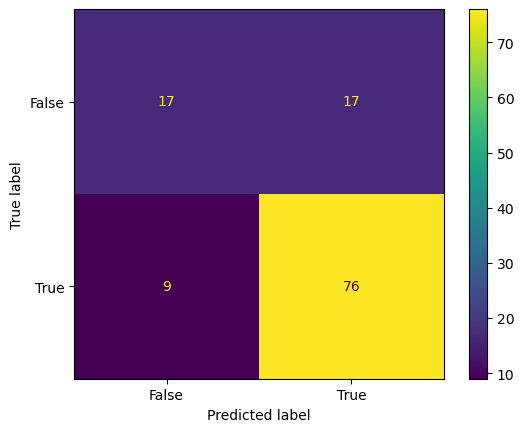

In [777]:
#print the confusion matrix for ridge classifier.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_ridge = model_ridge.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred_ridge)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

plt.show()


In [680]:
#perform grid search CV for random forest classifier.

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

pipeline = Pipeline([
    ('encoding', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('scaling', MinMaxScaler()),
    ('classifier', RandomForestClassifier())
])

# Find the best hyperparameters using GridSearchCV on the train set
param_grid = {'classifier__n_estimators': range(10,100,10),
              'classifier__max_depth': range(2,20,2)
             }

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5)

grid.fit(X_train, y_train)


In [682]:
#print the hyper paramters eliciting best performance.

best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test, y_test)
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

Best test set accuracy: 0.7815126050420168
Achieved with hyperparameters: {'classifier__max_depth': 12, 'classifier__n_estimators': 40}


In [683]:
#train the random forest model with the hyperparameters.

pipeline = Pipeline([
    ('encoding', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('scaling', MinMaxScaler()),
    ('classifier', RandomForestClassifier(max_depth=12, n_estimators=40))
])

model_randomforest = pipeline.fit(X_train, y_train)

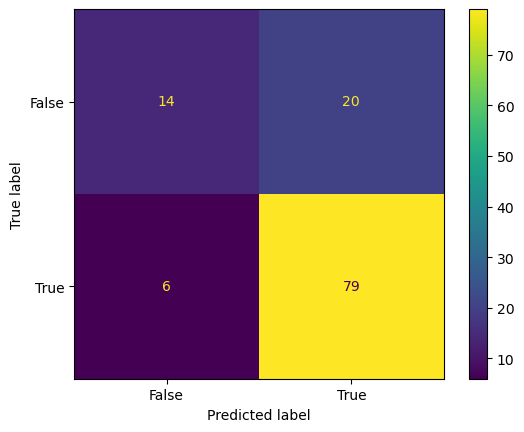

In [779]:
#print the confusion matrix for random forest classifier.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_randomforest = model_randomforest.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred_randomforest)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

plt.show()


In [690]:
#perform grid search CV for xgboost classifier.

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

pipeline = Pipeline([
    ('encoding', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('scaling', MinMaxScaler()),
    ('classifier', XGBClassifier())
])

# Find the best hyperparameters using GridSearchCV on the train set
param_grid = {'classifier__n_estimators': range(10,100,10),
              'classifier__max_depth': range(2,20,2),
              'classifier__learning_rate': np.arange(0.01, 0.3, 0.02),
             }

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5)

grid.fit(X_train, y_train)


In [692]:
# print the hyper paramters eliciting best performance.

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test, y_test)
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

Best test set accuracy: 0.773109243697479
Achieved with hyperparameters: {'classifier__learning_rate': 0.20999999999999996, 'classifier__max_depth': 2, 'classifier__n_estimators': 30}


In [693]:
#train the xgboost model with the hyperparameters.

pipeline = Pipeline([
    ('encoding', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('scaling', MinMaxScaler()),
    ('classifier', XGBClassifier(max_depth=2, n_estimators=30, learning_rate=0.21))
])

model_xgboost = pipeline.fit(X_train, y_train)

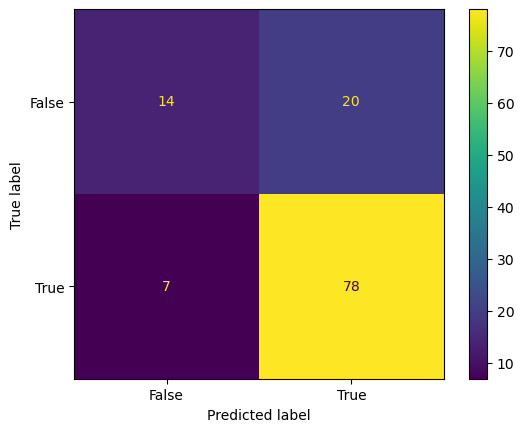

In [780]:
#print the confusion matrix for xgboost classifier.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_xgboost = model_xgboost.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred_xgboost)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

plt.show()


In [698]:
# save the models to files.

import pickle

# Save to a file using Pickle
with open('model_ridge.pkl', 'wb') as file_handle: # wb=write binary
    pickle.dump(model_ridge, file_handle)

with open('model_randomforst.pkl', 'wb') as file_handle: # wb=write binary
    pickle.dump(model_randomforest, file_handle)

with open('model_xgboost.pkl', 'wb') as file_handle: # wb=write binary
    pickle.dump(model_xgboost, file_handle)


## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [ ]:
#copy the model files to AWS 

scp -i ~/.ssh/key_bc_ds.pem ~/mini_project_IV/model_ridge.py ubuntu@ec2-34-207-221-17.compute-1.amazonaws.com:~/jupynotes

scp -i ~/.ssh/key_bc_ds.pem ~/mini_project_IV/model_randomforest.py ubuntu@ec2-34-207-221-17.compute-1.amazonaws.com:~/jupynotes 

scp -i ~/.ssh/key_bc_ds.pem ~/mini_project_IV/model_xgboost.py ubuntu@ec2-34-207-221-17.compute-1.amazonaws.com:~/jupynotes